<a href="https://colab.research.google.com/github/samjurassic/datascience-demo/blob/main/intro/pandas-intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python Workshop: Part 1

Welcome! Here you will find a crash course in Python aimed at researchers and anyone else who works with data.

This is a Jupyter Notebook - it allows you to run Python code, write text and tables in Markdown, and view image and other outputs. This is especially useful for exploratory data analysis, developing machine learning models, and any other interactive tasks where you want to run code in sections or iterate on your work without running a whole program.

Some helpful keyboard shortcuts for working in Jupyter notebooks: https://digitalhumanities.hkust.edu.hk/tutorials/jupyter-notebook-tips-and-shortcuts/

We will be focusing on common data manipulation tasks in Pandas, this focuses on solutions without too many low-level details, so be sure to check out the documentation if you want to learn more about the underlying functionality: https://pandas.pydata.org/docs/index.html

In [1]:
import pandas as pd  # data frames, tabular data read/write
import numpy as np  # linear algebra, math functions
import seaborn as sns  # plotting

from datetime import (
    datetime,
)  # we are only importing the datetime class from the datetime library

### Types and Variables (this is a markdown cell)

In [2]:
# this is a comment (this is a code cell)

"""
This is a multi-line
comment
"""

# types of variables

# integer
a = 3
# float (up to 64-bit)
b = 2.55
# string
d = "boat"
# boolean (True, False) ~ (1, 0)
f = True
g = False

### Intro to DataFrames

In [3]:
# basics
important_data = {
    "name": ["dom", "brian", "mia", "han"],
    "car": ["charger", "skyline", "integra", "RX-7"],
    "how_fast": [7, 8, 5, 9],
    "how_furious": [9, 3, 4, 2],
}

# this is a data frame, you can fill it with any data that is table-like
important_df = pd.DataFrame(important_data)

important_df.head()

,name,car,how_fast,how_furious
0,dom,charger,7,9
1,brian,skyline,8,3
2,mia,integra,5,4
3,han,RX-7,9,2


In [4]:
# data frames are objects with many METHODS, these are functions we access like: df.method()

# describe returns summary statistics for numeric types
important_df.describe()

,how_fast,how_furious
count,4.000000,4.000000
mean,7.250000,4.500000
std,1.707825,3.109126
min,5.000000,2.000000
25%,6.500000,2.750000
50%,7.500000,3.500000
75%,8.250000,5.250000
max,9.000000,9.000000


<Axes: title={'center': 'The disposition of various family members'}, xlabel='name'>

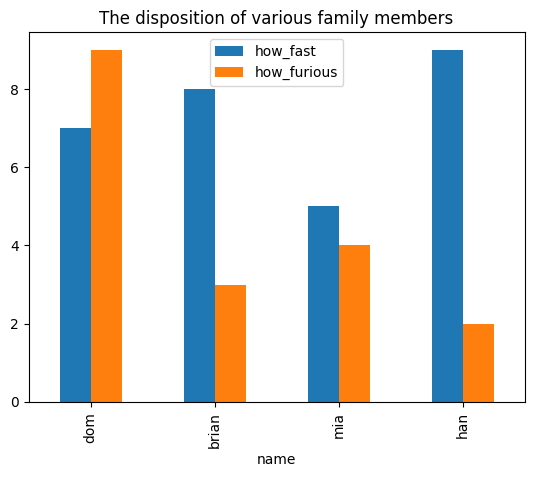

In [5]:
# there is a built-in plotting method...
important_df.plot(
    x="name", kind="bar", title="The disposition of various family members"
)

In [6]:
# data frames also have many ATTRIBUTES, these are data, not functions, so no parentheses: df.attribute
important_df.dtypes

,0
name,object
car,object
how_fast,int64
how_furious,int64


In [7]:
important_df.shape

(4, 4)

In [8]:
# columns can be accessed with square brackets or attribute notation
print(important_df["name"])
print(important_df.name)

0      dom
1    brian
2      mia
3      han
Name: name, dtype: object
0      dom
1    brian
2      mia
3      han
Name: name, dtype: object


### Reading data from a file

In [9]:
"""
DATA.gov provides open source government data from Federal, State, County, and City agencies

Let's take a look at a dataset from the Consumer Financial Protection Bureau

https://catalog.data.gov/dataset/college-credit-card-marketing-agreements-data

As required by the Credit CARD Act of 2009, we collect information annually from credit card issuers who
have marketing agreements with universities, colleges, or affiliated organizations such as alumni associations,
sororities, fraternities, and foundations.

Data dictionary: https://files.consumerfinance.gov/f/documents/cfpb_college-credit-card-data-guide_2022.pdf

"""

# you can use a URL to a file or a file path on your computer
file_location = "https://files.consumerfinance.gov/f/documents/cfpb_college-credit-card-agreements-database-2009-2019.csv"

# read_csv is for reading csv files, there's also read_excel, etc... with many adjustable parameters to match your file format
df = pd.read_csv(file_location)

In [10]:
# head (tail) shows the first (last) 5 lines of the dataframe (unless you specify a number: e.g. df.tail(8))
df.head()

,REPORTING YEAR,INSTITUTION OR ORGANIZATION,TYPE OF INSTITUTION OR ORGANIZATION,CITY,STATE,CREDIT CARD ISSUER,STATUS,IN EFFECT AS OF BEGINNING OF NEXT YEAR,TOTAL OPEN ACCOUNTS AS OF END OF REPORTING YEAR,PAYMENTS BY ISSUER,NEW ACCOUNTS OPENED IN REPORTING YEAR
0,2009,"Educational Communications, Inc.",Other,Lake Forest,IL,"FIA Card Services, N.A.",NaN,NaN,10765.0,-,-
1,2009,The Alumni Associationof the University of Neb...,Alumni Association,Lincoln,NE,Chase Bank,NaN,NaN,8368.0,-,-
2,2009,"Brazos Higher Education Service Corporation, Inc.",Other,Waco,TX,"FIA Card Services, N.A.",NaN,NaN,1086.0,-,-
3,2009,Regents of the University of Minnesota,University,Minneapolis,MN,Chase Bank,NaN,NaN,1002.0,-,-
4,2009,United States Air Force Academy Athletic Assoc...,Other,USAFA,CO,Chase Bank,NaN,NaN,984.0,-,-


In [11]:
# Info shows you the types and non-missing counts of data in each column, plus memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   REPORTING YEAR                                   5528 non-null   int64  
 1   INSTITUTION OR ORGANIZATION                      5528 non-null   object 
 2   TYPE OF INSTITUTION OR ORGANIZATION              5528 non-null   object 
 3   CITY                                             5528 non-null   object 
 4   STATE                                            5528 non-null   object 
 5   CREDIT CARD ISSUER                               5528 non-null   object 
 6   STATUS                                           4477 non-null   object 
 7   IN EFFECT AS OF BEGINNING OF NEXT YEAR           4483 non-null   object 
 8   TOTAL OPEN ACCOUNTS AS OF END OF REPORTING YEAR  5527 non-null   float64
 9   PAYMENTS BY ISSUER            

In [12]:
# what's up with the "object" columns??? Mixed types, usually!
df[
    "PAYMENTS BY ISSUER"
].value_counts()  # This is WACK and a bad practice (mixing types, that is). Let's fix it!

# we can fix it by reassigning the column using to_numeric (coerce makes non-numbers NaN)
# pd.to_numeric(df.payments_by_issuer, errors='coerce')

,count
PAYMENTS BY ISSUER,
-,531
0,364
100000,55
25000,41
10000,38
...,...
2621.66,1
2606.7,1
2596.71,1


In [13]:
# here is a way to get the unique non-numeric values...
"""
Breaking this down:
df['PAYMENTS BY ISSUER']: our column
pd.to_numeric(df['PAYMENTS BY ISSUER'], errors='coerce').isnull(): tries to convert to number, null if not, returns true for isnull
['PAYMENTS BY ISSUER'].unique(): grabbing unique values from our original column
"""

# let's add this to our read_csv instead (see top) along with specific dtypes
na_values = df["PAYMENTS BY ISSUER"][
    pd.to_numeric(df["PAYMENTS BY ISSUER"], errors="coerce").isnull()
].unique()

# we can add a list of na_values as well as a dict of dtypes
df = pd.read_csv(
    file_location, na_values=na_values, dtype={"PAYMENTS BY ISSUER": "float64"}
)

In [14]:
# looks as expected now!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   REPORTING YEAR                                   5528 non-null   int64  
 1   INSTITUTION OR ORGANIZATION                      5528 non-null   object 
 2   TYPE OF INSTITUTION OR ORGANIZATION              5528 non-null   object 
 3   CITY                                             5528 non-null   object 
 4   STATE                                            5528 non-null   object 
 5   CREDIT CARD ISSUER                               5528 non-null   object 
 6   STATUS                                           4477 non-null   object 
 7   IN EFFECT AS OF BEGINNING OF NEXT YEAR           4483 non-null   object 
 8   TOTAL OPEN ACCOUNTS AS OF END OF REPORTING YEAR  5527 non-null   float64
 9   PAYMENTS BY ISSUER            

### Cleaning up column names and values

In [15]:
# let's clean up these column names
col_rename = {
    "REPORTING YEAR": "year",
    "INSTITUTION OR ORGANIZATION": "institution",
    "TYPE OF INSTITUTION OR ORGANIZATION": "institution_type",
    "CREDIT CARD ISSUER": "issuer",
    "CITY": "city",
    "STATE": "state",
    "STATUS": "status",
    "IN EFFECT AS OF BEGINNING OF NEXT YEAR": "in_effect_ny",
    "TOTAL OPEN ACCOUNTS AS OF END OF REPORTING YEAR": "total_open_acct_eoy",
    "PAYMENTS BY ISSUER": "payments_by_issuer",
    "NEW ACCOUNTS OPENED IN REPORTING YEAR": "new_acct_ry",
}

# rename columns like so, using inplace=True to modify your existing df, inplace=False returns a new df
df.rename(columns=col_rename, inplace=True)

# note this won't complain if you spell something wrong, so always good to check

In [16]:
# much better!
df.head(10)

,year,institution,institution_type,city,state,issuer,status,in_effect_ny,total_open_acct_eoy,payments_by_issuer,new_acct_ry
0,2009,"Educational Communications, Inc.",Other,Lake Forest,IL,"FIA Card Services, N.A.",NaN,NaN,10765.0,NaN,NaN
1,2009,The Alumni Associationof the University of Neb...,Alumni Association,Lincoln,NE,Chase Bank,NaN,NaN,8368.0,NaN,NaN
2,2009,"Brazos Higher Education Service Corporation, Inc.",Other,Waco,TX,"FIA Card Services, N.A.",NaN,NaN,1086.0,NaN,NaN
3,2009,Regents of the University of Minnesota,University,Minneapolis,MN,Chase Bank,NaN,NaN,1002.0,NaN,NaN
4,2009,United States Air Force Academy Athletic Assoc...,Other,USAFA,CO,Chase Bank,NaN,NaN,984.0,NaN,NaN
5,2009,Arkansas State University Alumni Association,Alumni Association,State University,AR,Chase Bank,NaN,NaN,729.0,NaN,NaN
6,2009,University of California at Santa Barbara Alum...,Alumni Association,Santa Barbara,CA,Chase Bank,NaN,NaN,661.0,NaN,NaN
7,2009,Vassar College,University,Poughkeepsie,NY,"FIA Card Services, N.A.",NaN,NaN,362.0,NaN,NaN
8,2009,St. Bonaventure University,University,St. Bonaventure,NY,Chase Bank,NaN,NaN,301.0,NaN,NaN
9,2009,"California State University, Hayward Alumni As...",Alumni Association,Hayward,CA,"FIA Card Services, N.A.",NaN,NaN,289.0,NaN,NaN


### GroupBy

In [17]:
df.groupby(["state"]).agg({"new_acct_ry": "sum"})

,new_acct_ry
state,
AK,4.0
AL,8192.0
AR,3779.0
AZ,6731.0
Al,32.0
CA,61999.0
CO,7611.0
CO,2040.0
CT,3786.0


You usually end up having to fix data issues as-you-go, so make sure you go back and update prior code as needed

In [18]:
# let's fix Texas and Utah and Massachusetts using the replace method and a dict {"original": "new"}
df.state = df.state.replace({"Texas": "TX", "Utah": "UT", "Ma": "MA"})

Exercise:  Top 10 States by new accounts opened

In [19]:
# let's sort the results this time
df.groupby(["state"]).agg({"new_acct_ry": "sum"}).sort_values(
    by="new_acct_ry", ascending=False
).head(10)

,new_acct_ry
state,
CA,61999.0
IN,52468.0
WA,43782.0
UT,41570.0
PA,29157.0
MA,28767.0
IL,27454.0
NY,26447.0
TX,24071.0


<Axes: xlabel='state', ylabel='new_acct_ry'>

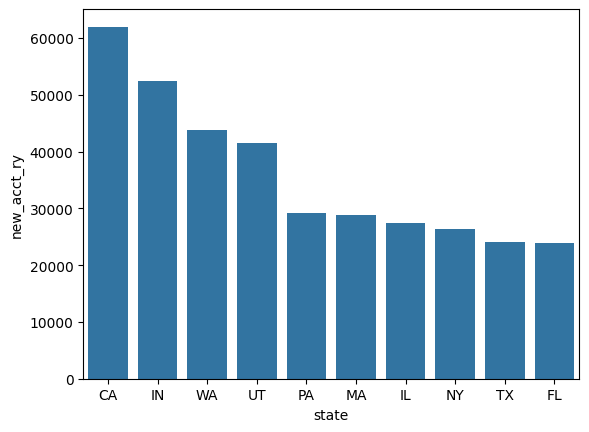

In [20]:
# let's make a chart of the top 10 states
state_new_accounts = (
    df.groupby(["state"])
    .agg({"new_acct_ry": "sum"})
    .sort_values(by="new_acct_ry", ascending=False)
    .reset_index()
    .head(10)
)

# let's use seaborn barplot (you need to provide a df, and names of x and y axes)
sns.barplot(data=state_new_accounts, x="state", y="new_acct_ry")

#### Exercise: Make a plot of total_open_acct_eoy by year

<Axes: xlabel='year', ylabel='total_open_acct_eoy'>

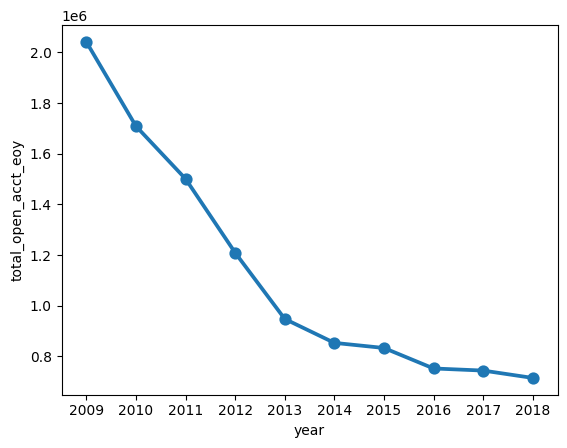

In [21]:
# let's make a chart of the top 10 states
year_new_accounts = (
    df.groupby(["year"])
    .agg({"total_open_acct_eoy": "sum"})
    .sort_values(by="total_open_acct_eoy", ascending=False)
    .reset_index()
    .head(10)
)

# let's use seaborn pointplot (you need to provide a df, and names of x and y axes)
sns.pointplot(data=year_new_accounts, x="year", y="total_open_acct_eoy")

In [22]:
# groupby with multiple aggregation functions and sorting multi-index
df.groupby(["state"]).agg({"new_acct_ry": ["sum", "count"]}).sort_values(
    [("new_acct_ry", "sum")], ascending=False
).head(10)

new_acct_ry      
              sum count
state                  
CA        61999.0   249
IN        52468.0   186
WA        43782.0    47
UT        41570.0    30
PA        29157.0   451
MA        28767.0   163
IL        27454.0   161
NY        26447.0   283
TX        24071.0   221
FL        23873.0   129

### Querying and indexing

There are many ways to filter and select data in pandas, query is best if you want to use an expression, indices are best for specifying columns and rows

In [23]:
# we can use string methods to filter text columns (startswith, contains, endswith)
df.query("institution.str.contains('City College')")

,year,institution,institution_type,city,state,issuer,status,in_effect_ny,total_open_acct_eoy,payments_by_issuer,new_acct_ry
458,2009,Alumni Associationof the City College of New York,Alumni Association,New York,NY,"FIA Card Services, N.A.",NaN,NaN,692.0,15299.00,46.0
611,2009,New York City College of Technology Alumni Ass...,Alumni Association,Brooklyn,NY,"FIA Card Services, N.A.",NaN,NaN,651.0,6377.00,18.0
1481,2010,Alumni Associationof the City College of New York,Alumni Association,New York,NY,"FIA Card Services, N.A.",Same,Yes,655.0,14256.72,34.0
1670,2010,New York City College of Technology Alumni Ass...,Alumni Association,Brooklyn,NY,"FIA Card Services, N.A.",Amended,No,570.0,4895.65,NaN
2464,2011,Alumni Associationof the City College of New York,Alumni Association,New York,NY,"FIA Card Services, N.A.",Amended,Yes,598.0,11960.70,9.0
3297,2012,Alumni Associationof the City College of New York,Alumni Association,New York,NY,"FIA Card Services, N.A.",Same,No,516.0,3818.49,NaN


In [24]:
# we can use string methods to filter text columns (startswith, contains, endswith)
df.query("institution.str.contains('Rutgers') and year > 2016")

,year,institution,institution_type,city,state,issuer,status,in_effect_ny,total_open_acct_eoy,payments_by_issuer,new_acct_ry
4866,2017,Rutgers University Foundation,Alumni Association,New Brunswick,NJ,First National Bank of Omaha,Same,Yes,852.0,0.00,362.0
5119,2018,Rutgers University Foundation,Alumni Association,New Brunswick,NJ,First National Bank of Omaha,Same,Yes,1062.0,200000.05,381.0
5435,2019,Rutgers University Foundation,Alumni Association,New Brunswick,NJ,First National Bank of Omaha,Same,Yes,1173.0,200000.00,120.0


In [25]:
# we can use string methods to filter text columns (startswith, contains, endswith)
df.query("year == 2015 and city == 'New York'")

,year,institution,institution_type,city,state,issuer,status,in_effect_ny,total_open_acct_eoy,payments_by_issuer,new_acct_ry
4337,2015,Alumni Association of CCNY,Alumni Association,New York,NY,UMB Bank,Same,Yes,22.0,152.10,4.0
4352,2015,New York Women in Communications Foundation,Foundation,New York,NY,UMB Bank,Same,Yes,5.0,11.44,0.0
4510,2015,New York University Alumni Association,Alumni Association,New York,NY,"FIA Card Services, N.A.",Same,Yes,9623.0,219600.00,1104.0
4532,2015,The Trustees of Columbia University,University,New York,NY,"FIA Card Services, N.A.",Same,Yes,7475.0,149950.66,449.0


In [26]:
# you can get the same result with indexing and booleans but I think this is more annoying to type and read
df[(df["year"] == 2015) & (df["city"] == "New York")]

,year,institution,institution_type,city,state,issuer,status,in_effect_ny,total_open_acct_eoy,payments_by_issuer,new_acct_ry
4337,2015,Alumni Association of CCNY,Alumni Association,New York,NY,UMB Bank,Same,Yes,22.0,152.10,4.0
4352,2015,New York Women in Communications Foundation,Foundation,New York,NY,UMB Bank,Same,Yes,5.0,11.44,0.0
4510,2015,New York University Alumni Association,Alumni Association,New York,NY,"FIA Card Services, N.A.",Same,Yes,9623.0,219600.00,1104.0
4532,2015,The Trustees of Columbia University,University,New York,NY,"FIA Card Services, N.A.",Same,Yes,7475.0,149950.66,449.0


In [27]:
# iloc is your friend if you want to select data by position i.e. column or row number
# here we are selecting ranges of columns and rows, i.e. df.iloc[rows,columns]
df.iloc[2:8, 3:8]

,city,state,issuer,status,in_effect_ny
2,Waco,TX,"FIA Card Services, N.A.",NaN,NaN
3,Minneapolis,MN,Chase Bank,NaN,NaN
4,USAFA,CO,Chase Bank,NaN,NaN
5,State University,AR,Chase Bank,NaN,NaN
6,Santa Barbara,CA,Chase Bank,NaN,NaN
7,Poughkeepsie,NY,"FIA Card Services, N.A.",NaN,NaN


### Method chaining

It's easy to make mistakes in notebooks by running cells out of order. One way I like to keep my code clean is by using method chaining in a single cell instead of spreading code out over several cells. This allows us to combine multiple dataframe methods in a pipeline of sorts.

In [28]:
# example: top ten cities in Texas according to sum of "payments by issuer"
df.query("state == 'TX'").groupby("city").agg(
    {"payments_by_issuer": "sum"}
).sort_values("payments_by_issuer", ascending=False).iloc[:10]

,payments_by_issuer
city,
College Station,11744024.19
Austin,10921766.88
Lubbock,2583919.52
Houston,1468230.58
Arlington,715088.68
Denton,407479.45
San Marcos,302688.40
Fort Worth,256915.52
Edinburg,184127.09
